In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from pygam import LinearGAM, s
from functools import reduce

In [4]:
data = pd.read_csv("../data/processed/warsaw_house_data_500.csv", index_col=0)

In [5]:
X, y = data.drop("cost", axis=1), data["cost"]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
n_features = X.shape[1]
terms = reduce(lambda a, b: a + b, [s(i) for i in range(n_features)])
gam = LinearGAM(terms)

In [8]:
gam.gridsearch(X_train, y_train)

100% (11 of 11) |########################| Elapsed Time: 0:00:09 Time:  0:00:090:00


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + intercept,
   tol=0.0001, verbose=False)

In [9]:
y_pred = gam.predict(X_val)

In [10]:
print(y_pred[:5])
print(y_val[:5])

[26017.61115731 19542.7413532  21385.865965   26017.61115731
 24184.14986802]
5349    51032.26
3011    15817.27
5799    20000.00
1430    24901.96
8791    22258.77
Name: cost, dtype: float64


In [11]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse:.3f}")
print(f"R2: {r2:.3f}\n")

MSE: 40177670.526
R2: 0.309



In [12]:
import numpy as np

importances = []

for i in range(n_features):
    XX = gam.generate_X_grid(term=i)
    pdep = gam.partial_dependence(term=i)
    importance = np.var(pdep)
    importances.append(importance)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Feature Importance': importances
}).sort_values(by="Feature Importance", ascending=False)

print(coefficients)

           Feature  Feature Importance
6       attraction        1.978965e+08
8             tree        1.662273e+08
12           hotel        1.292856e+07
9             bush        1.163923e+07
7          theatre        1.098940e+07
2             stop        8.599830e+06
0              lat        8.361644e+06
1              lon        6.279576e+06
5              aed        4.502103e+06
3     bike station        1.813079e+06
4         pharmacy        1.604767e+06
13            dorm        3.914847e+05
11  police station        6.678700e+04
10          forest        5.169879e-26


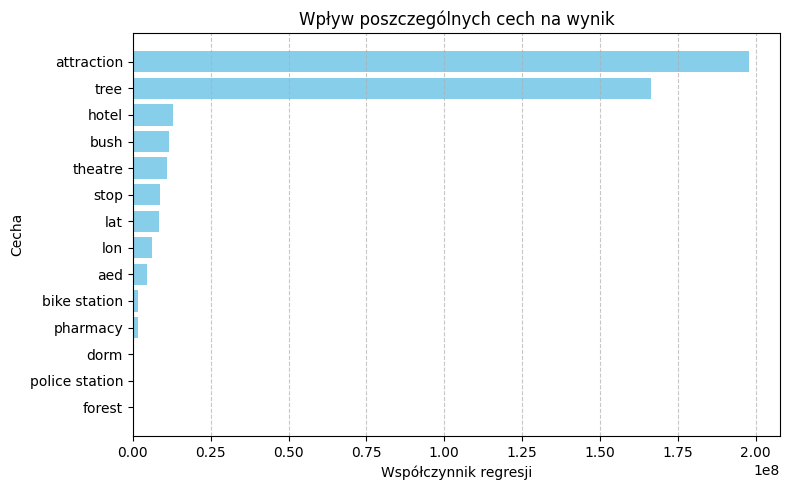

In [14]:
plt.figure(figsize=(8, 5))
plt.barh(coefficients["Feature"], coefficients["Feature Importance"], color='skyblue')
plt.title("Wpływ poszczególnych cech na wynik")
plt.xlabel("Współczynnik regresji")
plt.ylabel("Cecha")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("../reports/figures/gam_feature_importance_plot.png")
plt.show()